In [1]:
%reset -f

In [2]:
# take out the trash
import gc
import warnings
gc.collect()
warnings.filterwarnings('ignore')

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn: KNN, SVM, LR, RF
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV

# Custom Packages
import Helpers
from BPCA import *
from MCROC import *
from AccuracyMetrics import *
from KNN import *
from LR import *
from RF import *
from SVM import *

In [3]:
X_train2 = pd.read_csv('../data/1/TrainData2.txt', delimiter='\s+', header=None)
y_train2 = pd.read_csv('../data/1/TrainLabel2.txt', delimiter='\n', header=None)
X_test2 = pd.read_csv('../data/1/TestData2.txt', delimiter='\s+', header=None)

X_train3 = pd.read_csv('../data/1/TrainData3.txt', delimiter='\s+', header=None)
y_train3 = pd.read_csv('../data/1/TrainLabel3.txt', delimiter='\n', header=None)
X_test3 = pd.read_csv('../data/1/TestData3.txt', delimiter=',',   header=None)

X_train4 = pd.read_csv('../data/1/TrainData4.txt', delimiter='\s+', header=None)
y_train4 = pd.read_csv('../data/1/TrainLabel4.txt', delimiter='\n', header=None)
X_test4 = pd.read_csv('../data/1/TestData4.txt', delimiter='\s+', header=None)

X_train5 = pd.read_csv('../data/1/TrainData5.txt', delimiter='\s+', header=None)
y_train5 = pd.read_csv('../data/1/TrainLabel5.txt', delimiter='\n', header=None)
X_test5 = pd.read_csv('../data/1/TestData5.txt', delimiter='\s+', header=None)

X_train6 = pd.read_csv('../data/1/TrainData6.txt', delimiter='\s+', header=None)
y_train6 = pd.read_csv('../data/1/TrainLabel6.txt', delimiter='\n', header=None)
X_test6 = pd.read_csv('../data/1/TestData6.txt', delimiter='\s+', header=None)

X_training = [X_train2, X_train3, X_train4, X_train5, X_train6]
y_training = [y_train2, y_train3, y_train4, y_train5, y_train6]
X_testing = [X_test2, X_test3, X_test4, X_test5, X_test6]

for i,x in enumerate(X_training):
    print(f'X_TrainData{i+2} Shape: {x.shape}')

for i,y in enumerate(y_training):
    print(f'y_TrainData{i+2} Shape: {y.shape}')

for j,y in enumerate(X_testing):
    print(f'TestData{j+2} Shape: {y.shape}')

X_TrainData2 Shape: (100, 9182)
X_TrainData3 Shape: (6300, 13)
X_TrainData4 Shape: (2547, 112)
X_TrainData5 Shape: (1119, 11)
X_TrainData6 Shape: (612, 142)
y_TrainData2 Shape: (100, 1)
y_TrainData3 Shape: (6300, 1)
y_TrainData4 Shape: (2547, 1)
y_TrainData5 Shape: (1119, 1)
y_TrainData6 Shape: (612, 1)
TestData2 Shape: (74, 9182)
TestData3 Shape: (2693, 13)
TestData4 Shape: (1092, 112)
TestData5 Shape: (480, 11)
TestData6 Shape: (262, 142)


# Dataset 2

## PCA for DS2

In [4]:
Helpers.printShapes(X_train2=X_train2.shape, y_train2=y_train2.shape, X_test2=X_test2.shape)

Helpers.printHeads(X_train2=X_train2.head(), y_train2=y_train2.head())
           
Helpers.printTails(y_train2=y_train2.tail())


X_train2 Shape: (100, 9182)

y_train2 Shape: (100, 1)

X_test2 Shape: (74, 9182)

X_train2 Head:        0         1         2         3         4        5         6     \
0  2.357935  1.505150  1.477121  1.301030  2.992995  1.30103  2.729974   
1  1.995635  1.633468  1.740363  1.819544  3.703377  1.30103  3.000434   
2  1.929419  1.301030  1.447158  1.301030  3.377852  1.30103  3.053463   
3  2.227887  1.602060  1.556302  1.908485  3.424392  1.30103  3.084219   
4  1.763428  1.623249  1.301030  2.029384  3.551694  1.30103  3.165541   

       7         8         9     ...      9172      9173      9174      9175  \
0  3.275542  3.531734  2.117271  ...  1.531479  1.792392  2.000000  1.477121   
1  3.118926  3.363424  1.568202  ...  1.755875  2.064458  1.431364  1.633468   
2  3.390405  3.359836  1.707570  ...  1.982271  2.198657  1.301030  1.707570   
3  3.288696  3.364176  1.301030  ...  1.792392  2.204120  1.633468  1.716003   
4  3.141450  3.495128  1.886491  ...  1.301030  1.785330 

In [5]:
X_train2_cmp, X_test2_cmp = trainPCA(X_train2, X_test2)

X_train Variance: 0.9287852222496773
X_train Shape: (100, 9182)
X_train Variance: 1.0
X_train Shape: (74, 74)


In [6]:
Helpers.printShapes(X_train2_cmp=X_train2_cmp.shape, y_train2=y_train2.shape, X_test2_cmp=X_test2_cmp.shape)


X_train2_cmp Shape: (100, 74)

y_train2 Shape: (100, 1)

X_test2_cmp Shape: (74, 74)


### KNN for DS2

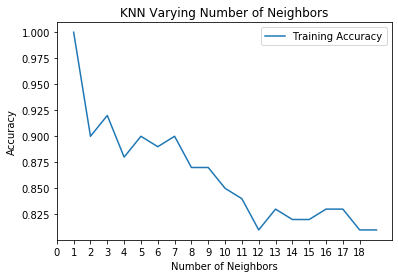

In [7]:
neighbors2, train_accuracy2 = testK(X_train2_cmp, y_train2)
plotTestK(neighbors2, train_accuracy2)

In [8]:
y_test2 = getTestLabelsKNN(7, X_train2_cmp, y_train2, X_test2_cmp)
n2, test_acc2, train_acc2 = optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2)

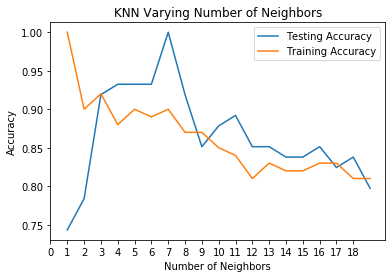

In [9]:
plotK(n2, test_acc2, train_acc2)

In [10]:
n_neighbors2=3
knn_score2, knn_y_pred2 = runKNN(n_neighbors2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)
print(f'Accuracy: {knn_score2}')

Accuracy: 0.918918918918919


In [11]:
getScoresKNN(n_neighbors2, y_test2, knn_y_pred2)
pd.crosstab(y_test2, knn_y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Accuracy Score, k=3: 0.918918918918919

KNN Confusion Matrix, k=3

[[15  0  0  1  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]]

		  KNN Classification Report, k=3

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         4
           4       0.95      0.95      0.95        19
           5       1.00      1.00      1.00         1
           6       0.96      0.96      0.96        23
           8       1.00      1.00      1.00         5
           9       0.50      0.33      0.40         3
          11       0.50      1.00      0.67         1

    accuracy                           0.92        74
   macro avg       0.80  

Predicted,1,2,3,4,5,6,8,9,11,All
True,,,,,,,,,,
1,15,0,0,1,0,0,0,0,1,17
2,0,1,0,0,0,0,0,0,0,1
3,0,0,4,0,0,0,0,0,0,4
4,0,0,0,18,0,0,0,1,0,19
5,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,22,0,0,0,23
8,0,0,0,0,0,0,5,0,0,5
9,0,1,0,0,0,1,0,1,0,3
11,0,0,0,0,0,0,0,0,1,1


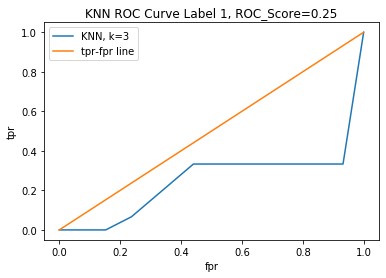

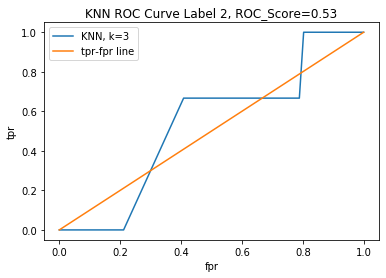

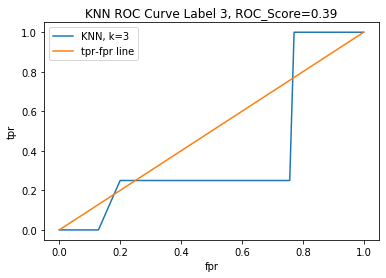

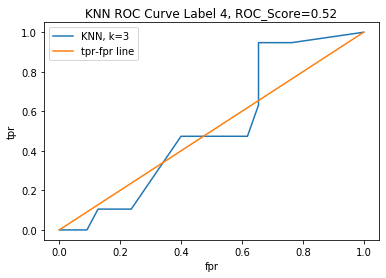

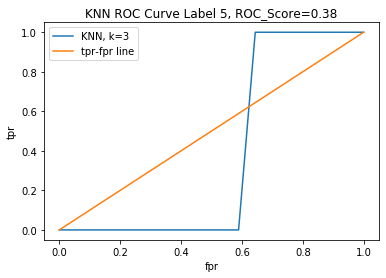

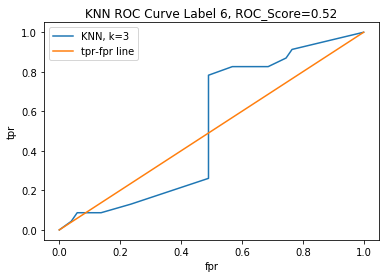

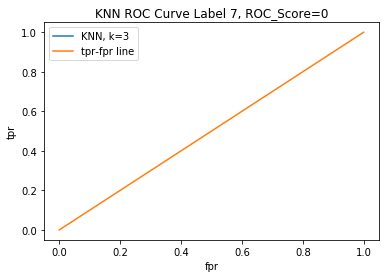

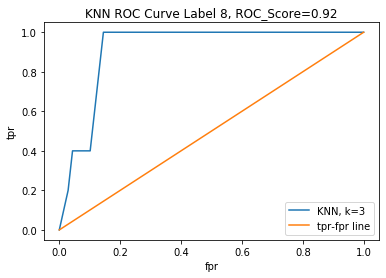

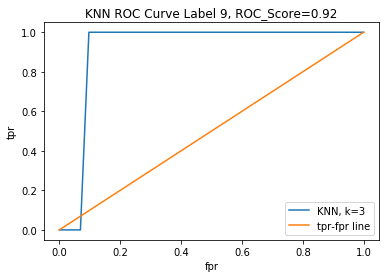

In [12]:
calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, knn_y_pred2, model='KNN', tuner='k',\
 tuner_val=n_neighbors2, label_len=9, dec=False)

__________________________________________________________________________________________________________________________________________________

### Logistic Regression for DS2

In [13]:

c2 = 10
lr_cma2, lr_cr2, lr_acc2, lr_y_pred2, ky2, val2  = runLogisticRegression(c2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

print(f'Logistic Regression Highest Accuracy Score, C={c2}: {val2}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma2[ky2]}\n')
pd.crosstab(y_test2, lr_y_pred2[ky2], rownames=['True'], colnames=['Predicted'], margins=True)
print(f'\n\t   Logistic Regression Classification Report C={c2}\n\n{lr_cr2[ky2]}')

Logistic Regression Highest Accuracy Score, C=10: 0.5405405405405406

Logistic Regression Most Accurate Confusion Matrix

[[ 8  0  0  0  3  0  0  2  0  3  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  1  0  0]
 [ 0  0  1 11  2  0  0  0  3  2  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  2  2  0  2 12  2  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  1  1]
 [ 0  1  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


	   Logistic Regression Classification Report C=10

              precision    recall  f1-score   support

           1       1.00      0.47      0.64        17
           2       0.25      1.00      0.40         1
           3       0.40      0.50      0.44         4
           4       1.00      0.58      0.73        19
           5       0.12      1.00      0.22         1
           6       1.00      0.52      0.69        23
           7       0.00      0.00      0.00     

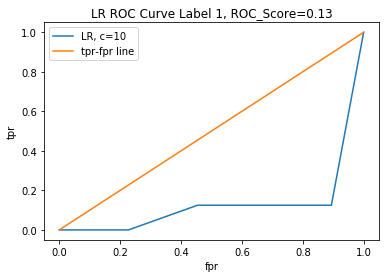

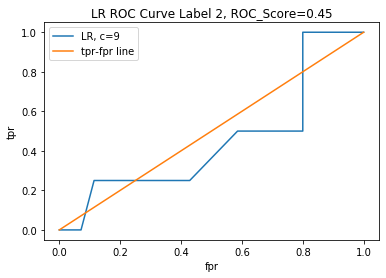

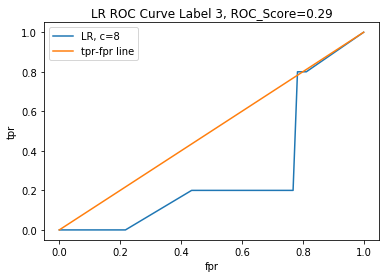

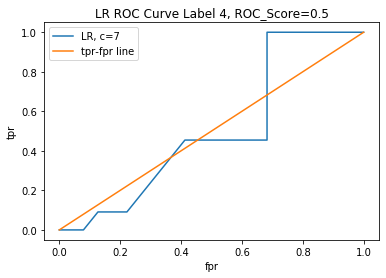

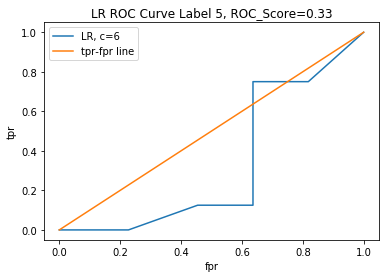

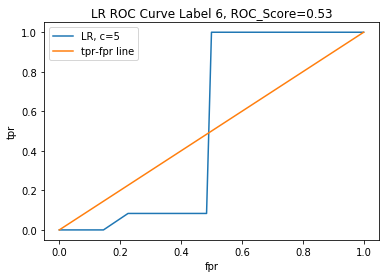

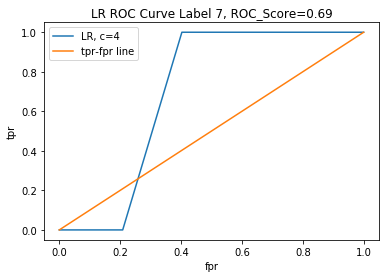

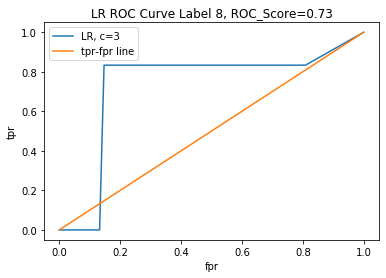

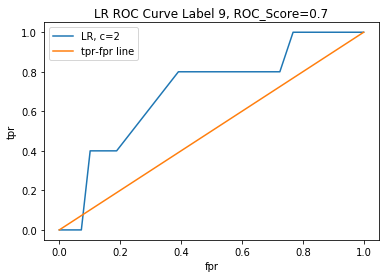

In [14]:
calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, lr_y_pred2[ky2], model='LR', tuner='c', tuner_val=c2, label_len=9, dec=True)

## Random Forest for DS2

Random Forest Accuracy Score: 0.2972972972972973

Random Forest Confusion Matrix

[[2 1 6 0 4 0 1 0 2 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 1 2 0 0 0 0 0 1 0]
 [0 4 2 8 4 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 2 0 4 9 3 0 3 1]
 [0 0 1 1 1 0 1 0 1 0]
 [0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.67      0.12      0.20        17
           2       0.00      0.00      0.00         1
           3       0.14      0.50      0.22         4
           4       0.89      0.42      0.57        19
           5       0.00      0.00      0.00         1
           6       1.00      0.39      0.56        23
           8       0.17      0.20      0.18         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1

    accuracy                           0.30       

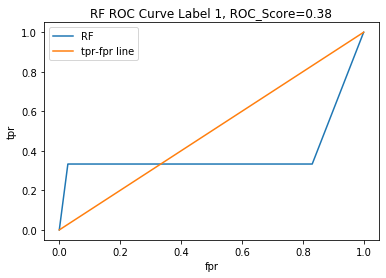

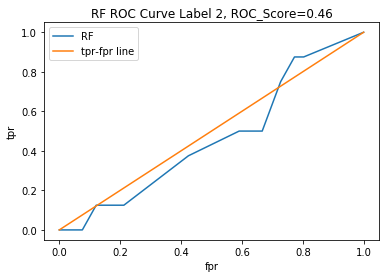

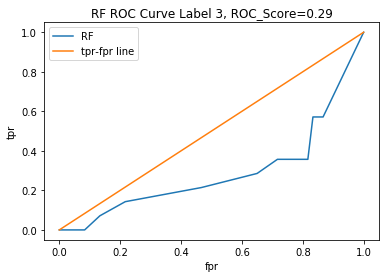

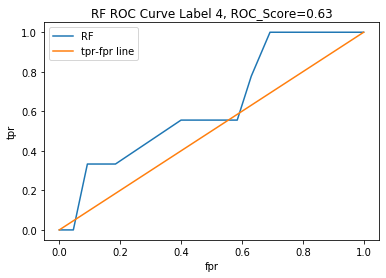

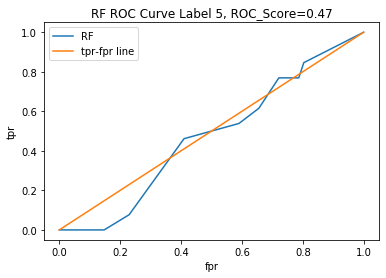

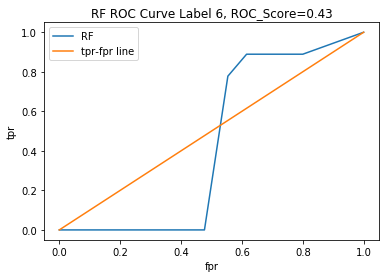

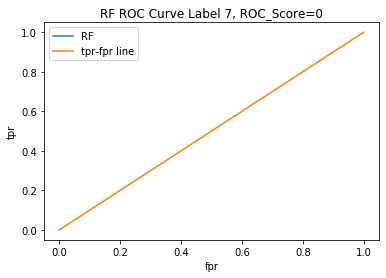

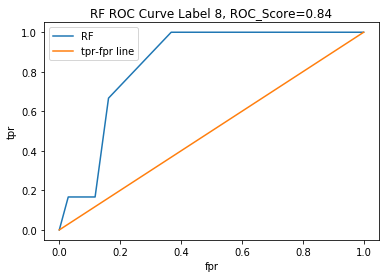

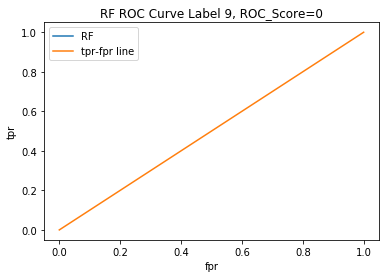

In [15]:
runRandomForest(X_train2_cmp, y_train2, X_test2_cmp, y_test2, 9)

## SVM for DS2

SVM linear Kernel results
_________________________________________
SVM linear Kernel Accuracy Score: 0.5

SVM linear Kernel Confusion Matrix

[[ 4  0  2  0  4  0  0  2  0  4  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  2 11  2  0  1  1  1  1  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  5  1  0  2 13  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  2  0]
 [ 0  2  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       1.00      0.24      0.38        17
           2       0.12      1.00      0.22         1
           3       0.38      0.75      0.50         4
           4       1.00      0.58      0.73        19
           5       0.11      1.00      0.20         1
           6       1.00      0.57      0.72        23
           7       0.00      0.0

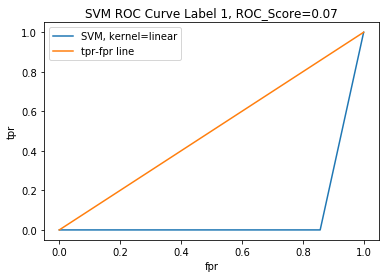

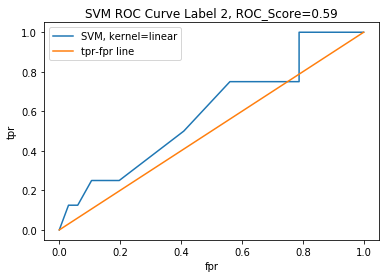

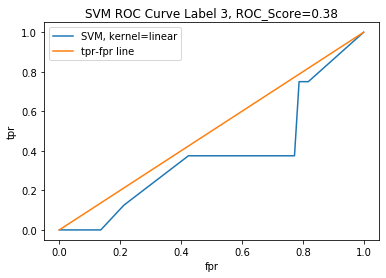

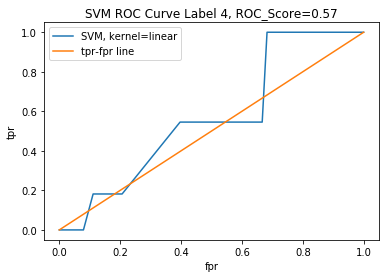

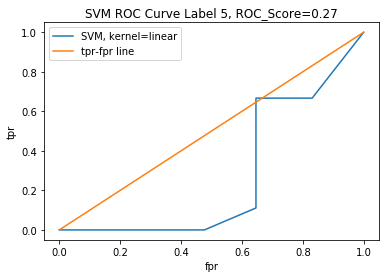

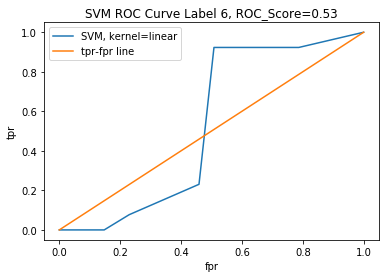

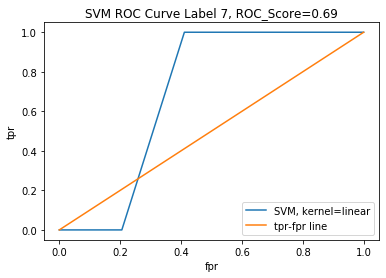

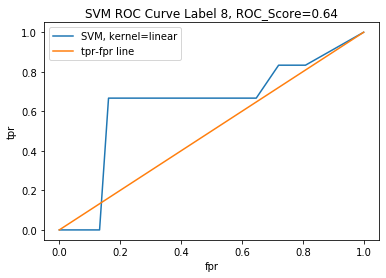

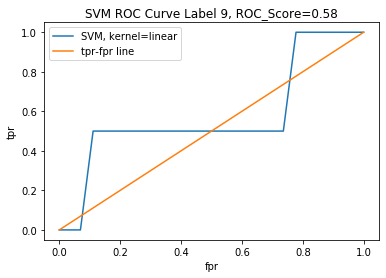

SVM poly Kernel results
_________________________________________
SVM poly Kernel Accuracy Score: 0.0945945945945946

SVM poly Kernel Confusion Matrix

[[ 0  0 17  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 0  0 18  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         1
           3       0.06      1.00      0.11         4
           4       1.00      0.05      0.10        19
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          11       1.00      1.00      1.00

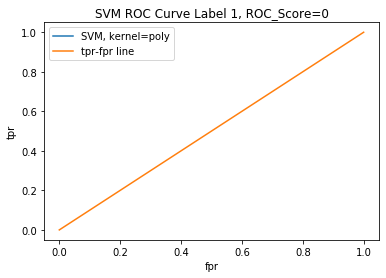

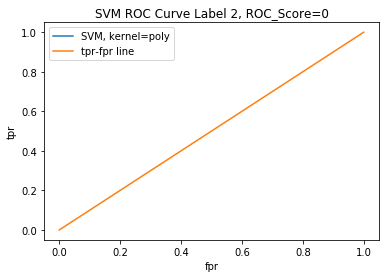

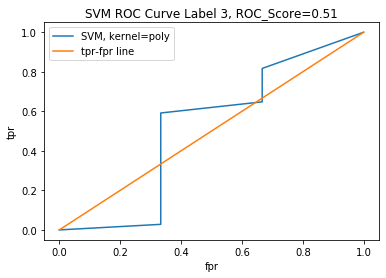

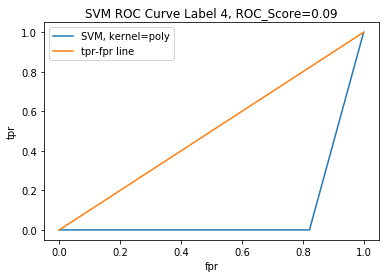

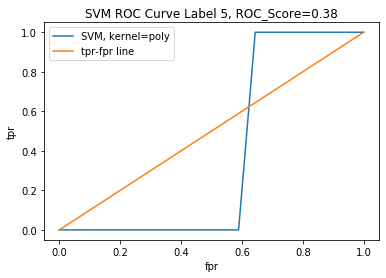

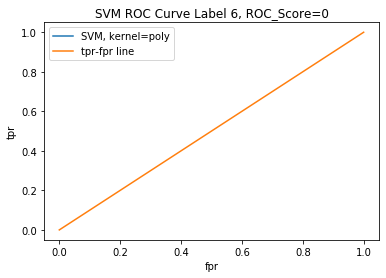

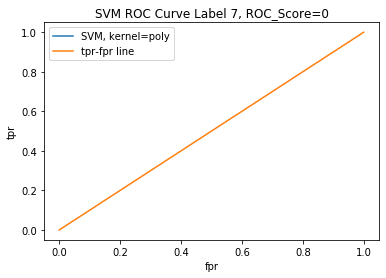

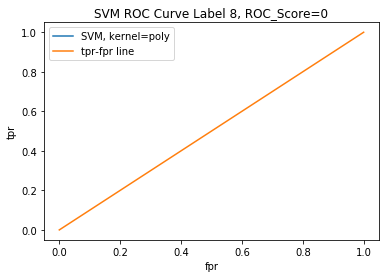

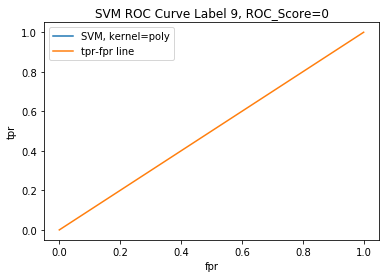

SVM rbf Kernel results
_________________________________________
SVM rbf Kernel Accuracy Score: 0.3108108108108108

SVM rbf Kernel Confusion Matrix

[[ 0  0  7  0  4  0  1  0  4  1]
 [ 0  0  0  0  0  0  0  0  0  1]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  4 10  4  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  1  3  0  4  4  3  0  7  1]
 [ 0  0  0  0  0  0  3  0  2  0]
 [ 0  2  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1]]


		    SVM rbf Kernel Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         1
           3       0.22      1.00      0.36         4
           4       1.00      0.53      0.69        19
           5       0.08      1.00      0.14         1
           6       1.00      0.17      0.30        23
           8       0.43      0.60      0.50         5
           9       0.00      0.00      0.

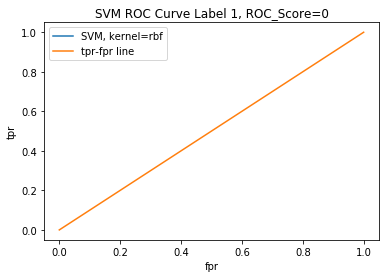

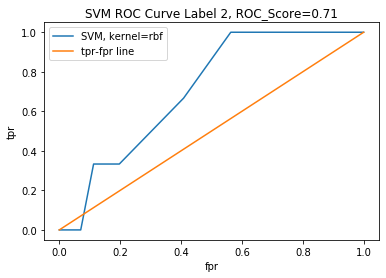

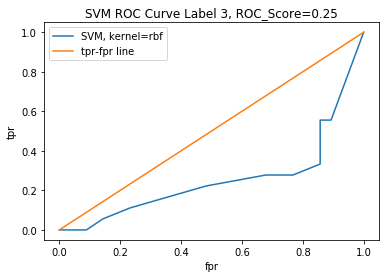

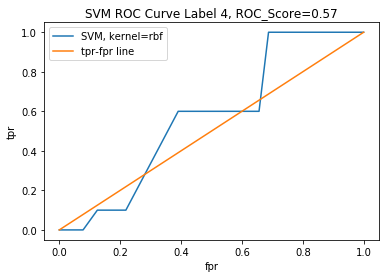

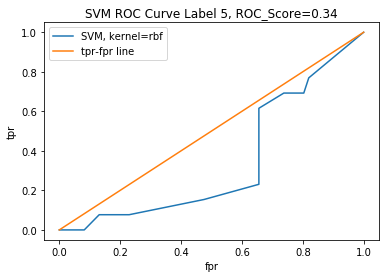

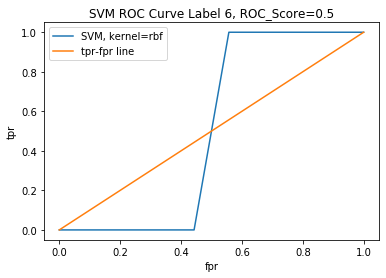

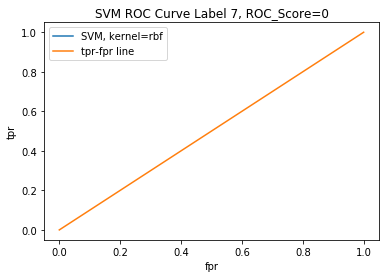

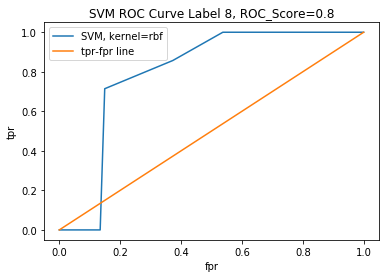

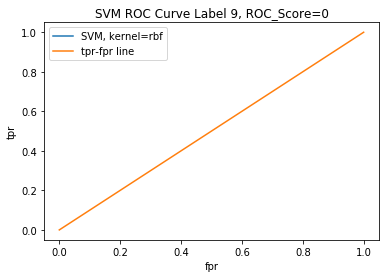

SVM sigmoid Kernel results
_________________________________________
SVM sigmoid Kernel Accuracy Score: 0.5

SVM sigmoid Kernel Confusion Matrix

[[ 6  0  1  0  4  0  0  2  0  3  1]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  3 11  4  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  2  1  0  2 11  2  0  0  3  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  2  0]
 [ 0  0  0  0  0  1  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


		    SVM sigmoid Kernel Classification Report

              precision    recall  f1-score   support

           1       1.00      0.35      0.52        17
           2       0.00      0.00      0.00         1
           3       0.38      0.75      0.50         4
           4       1.00      0.58      0.73        19
           5       0.09      1.00      0.17         1
           6       0.92      0.48      0.63        23
           7       0.00     

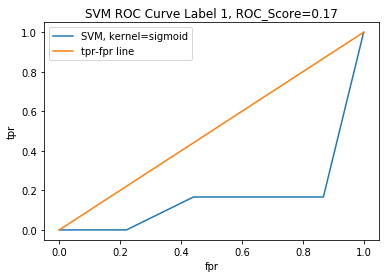

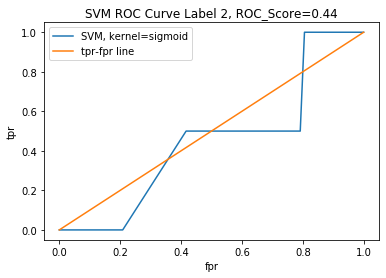

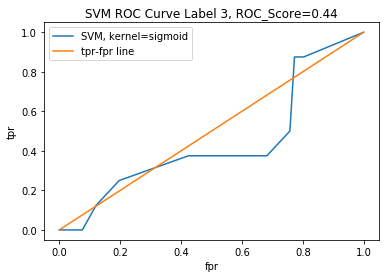

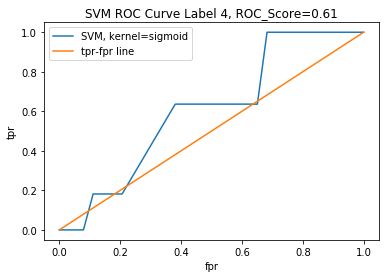

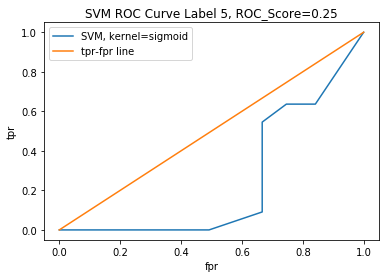

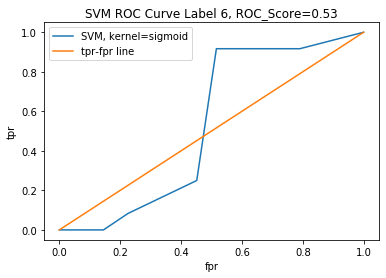

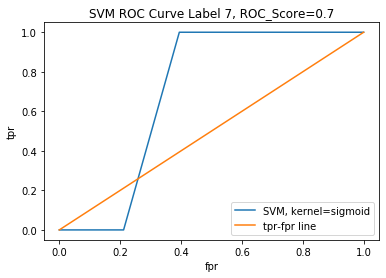

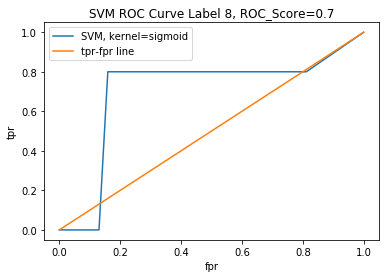

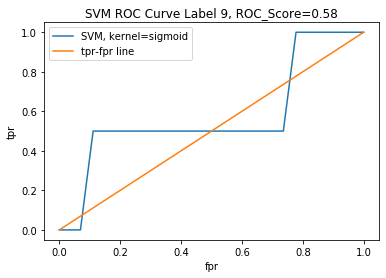

In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, 9, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

# Dataset 3

In [17]:
X_train3.shape

(6300, 13)

In [18]:
X_train3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,1.000000e+99
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.000000e+00
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.000000e+00
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00


In [19]:
X_train3 = Helpers.replaceWithNan(X_train3, 0, 12)

Bad Values 1.0000000000000001e+99 replaced with NaN. Run


In [20]:
X_train = Helpers.runFastKNN(X_train3, 50)

Running fast_knn, k=50.
